In [1]:
!pip install twython

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

plt.style.use('ggplot')

import nltk

In [3]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /usr/share/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [4]:
data = pd.read_csv('../input/womens-ecommerce-clothing-reviews/Womens Clothing E-Commerce Reviews.csv')
data.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [6]:
data.shape

(23486, 11)

In [7]:
data.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [8]:
data.dropna(inplace=True)

In [9]:
data.reset_index(drop=True, inplace=True)

In [10]:
data.shape

(19662, 11)

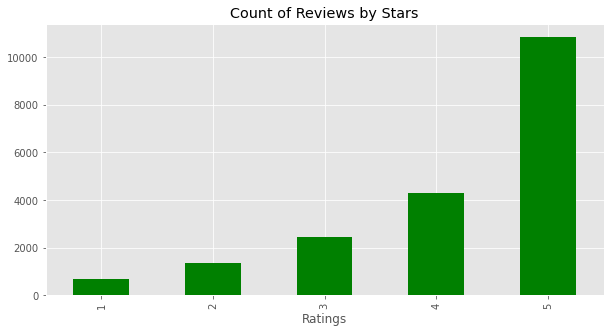

In [11]:
ax = data['Rating'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5), color='Green')
ax.set_xlabel('Ratings')
plt.show()

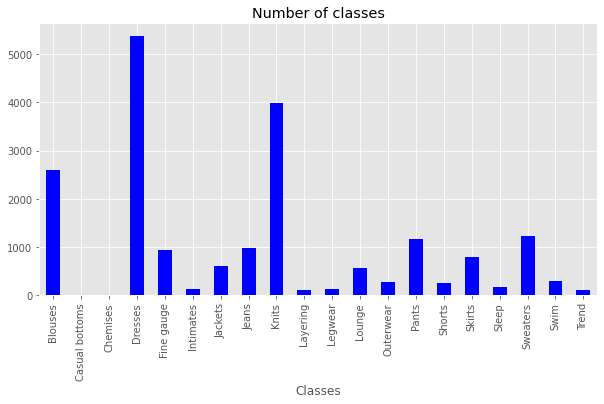

In [12]:
bx = data['Class Name'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Number of classes',
          figsize=(10, 5), color='Blue')
bx.set_xlabel('Classes')
plt.show()

<AxesSubplot:xlabel='Class Name', ylabel='Count'>

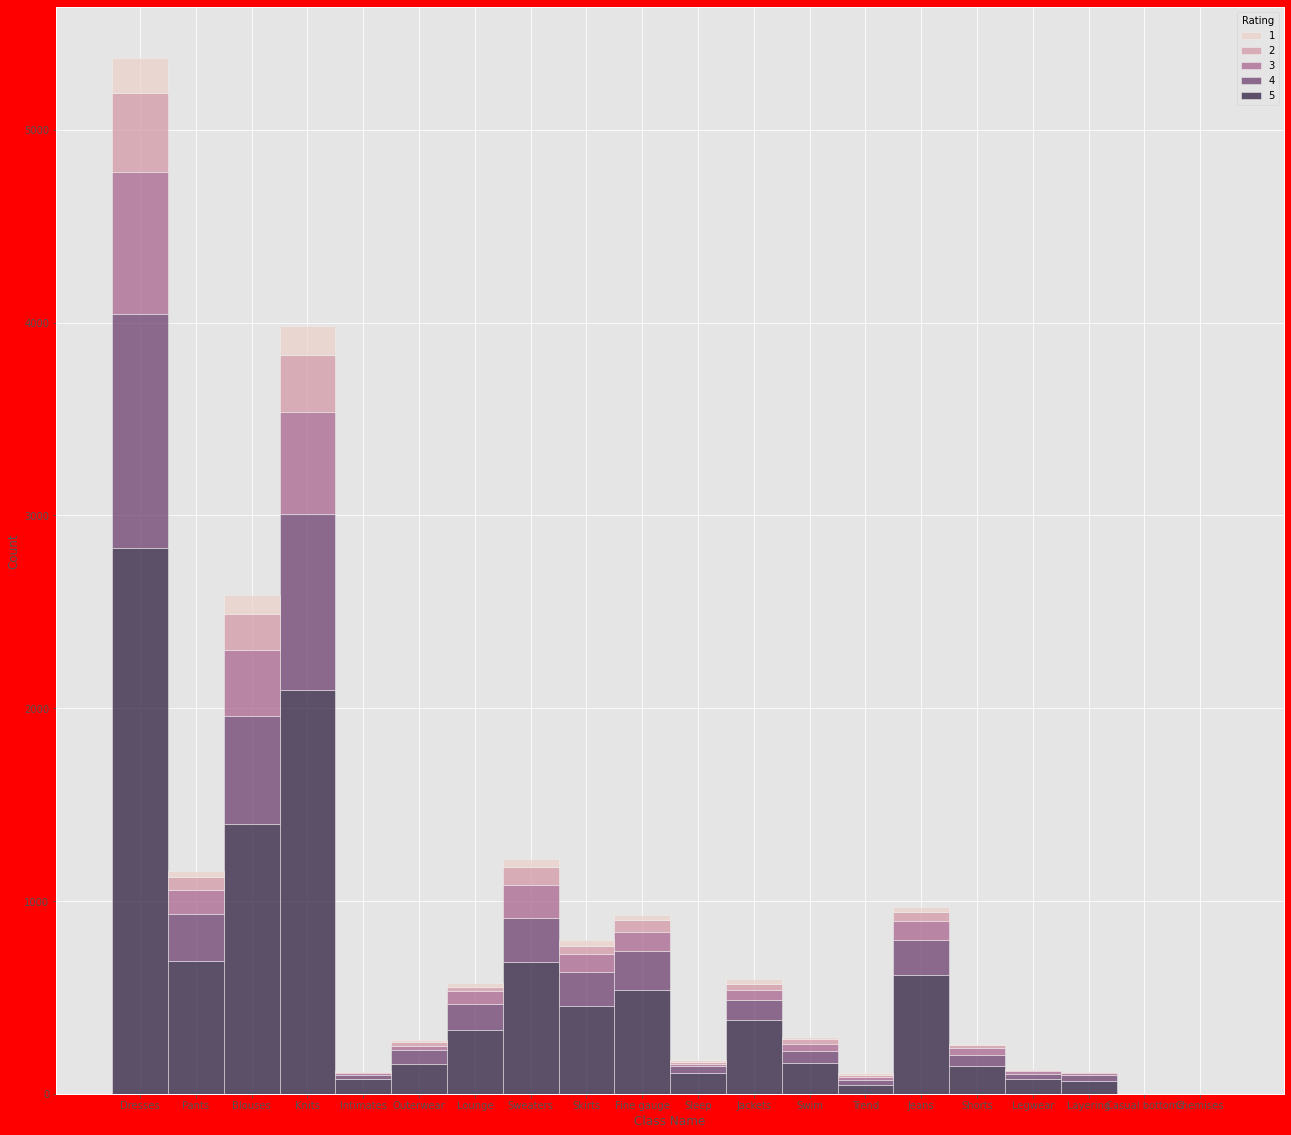

In [13]:
plt.figure(figsize=(22,20),facecolor='red',edgecolor='blue')
sns.histplot(data, x = data['Class Name'], hue = data['Rating'], multiple = 'stack')

In [14]:
example = data['Review Text'][56]
print(example)

Why do designers keep making crop tops??!! i can't imagine this would be flattering on anyone, especially someone average height and well endowed on top. i looked like a football player. the pattern and fabric are gorgeous, so if you are like 4' tall and super tiny and can fit xxs this may work? i am between a 6-8 and fit a small and it was huge on me and almost was bigger at the bottom than the top. such a weird cut. there is a cami underneath so if it rides up that will show but that is so 80s


In [15]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['Why', 'do', 'designers', 'keep', 'making', 'crop', 'tops', '?', '?', '!']

In [16]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('Why', 'WRB'),
 ('do', 'VBP'),
 ('designers', 'NNS'),
 ('keep', 'VB'),
 ('making', 'VBG'),
 ('crop', 'NN'),
 ('tops', 'NNS'),
 ('?', '.'),
 ('?', '.'),
 ('!', '.')]

In [17]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  Why/WRB
  do/VBP
  designers/NNS
  keep/VB
  making/VBG
  crop/NN
  tops/NNS
  ?/.
  ?/.
  !/.
  !/.
  i/NN
  ca/MD
  n't/RB
  imagine/VB
  this/DT
  would/MD
  be/VB
  flattering/VBG
  on/IN
  anyone/NN
  ,/,
  especially/RB
  someone/NN
  average/JJ
  height/NN
  and/CC
  well/RB
  endowed/VBN
  on/IN
  top/NN
  ./.
  i/NN
  looked/VBD
  like/IN
  a/DT
  football/NN
  player/NN
  ./.
  the/DT
  pattern/NN
  and/CC
  fabric/NN
  are/VBP
  gorgeous/JJ
  ,/,
  so/RB
  if/IN
  you/PRP
  are/VBP
  like/IN
  4/CD
  '/POS
  tall/NN
  and/CC
  super/JJ
  tiny/NN
  and/CC
  can/MD
  fit/VB
  xxs/VB
  this/DT
  may/MD
  work/VB
  ?/.
  i/VB
  am/VBP
  between/IN
  a/DT
  6-8/JJ
  and/CC
  fit/VB
  a/DT
  small/JJ
  and/CC
  it/PRP
  was/VBD
  huge/JJ
  on/IN
  me/PRP
  and/CC
  almost/RB
  was/VBD
  bigger/JJR
  at/IN
  the/DT
  bottom/NN
  than/IN
  the/DT
  top/JJ
  ./.
  such/PDT
  a/DT
  weird/JJ
  cut/NN
  ./.
  there/EX
  is/VBZ
  a/DT
  cami/JJ
  underneath/NN
  so/RB
  if/IN
  it/

# ***1.  VADER Seniment Scoring***

In [18]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [19]:
sia.polarity_scores(example)

{'neg': 0.028, 'neu': 0.772, 'pos': 0.2, 'compound': 0.9157}

In [20]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(data.iterrows(), total=len(data)):
    text = row['Review Text']
    myid = row['Clothing ID']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/19662 [00:00<?, ?it/s]

In [21]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'Clothing ID'})
vaders = vaders.merge(data, how='left')

In [22]:
vaders

,Clothing ID,neg,neu,pos,compound,Unnamed: 0,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,1077,0.0,0.743,0.257,0.8542,2,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
1,1077,0.0,0.743,0.257,0.8542,8,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses
2,1077,0.0,0.743,0.257,0.8542,9,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses
3,1077,0.0,0.743,0.257,0.8542,10,53,Dress looks like it's made of cheap material,Dress runs small esp where the zipper area run...,3,0,14,General,Dresses,Dresses
4,1077,0.0,0.743,0.257,0.8542,14,50,Pretty party dress with some issues,This is a nice choice for holiday gatherings. ...,3,1,1,General,Dresses,Dresses
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19657,262,0.0,0.802,0.198,0.6643,23461,49,Comfortable but not super-flattering on me,I tried these on at the store and the fit was ...,4,1,1,General Petite,Intimate,Lounge
19658,262,0.0,0.802,0.198,0.6643,23463,65,Comfy pants,"These pants overall are very comfortable, but ...",4,1,1,General Petite,Intimate,Lounge
19659,262,0.0,0.802,0.198,0.6643,23469,50,Comfy and cute,My size was not available so based on reviews ...,4,1,0,General Petite,Intimate,Lounge
19660,262,0.0,0.802,0.198,0.6643,23471,31,Awkward fit for me,"Love the way these pants look in the pictures,...",4,1,0,General Petite,Intimate,Lounge


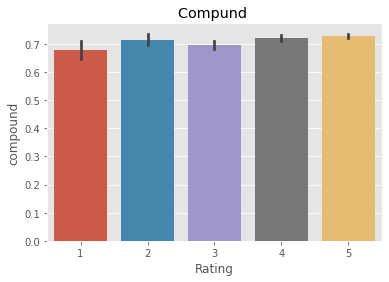

In [23]:
ax = sns.barplot(data=vaders, x='Rating', y='compound')
ax.set_title('Compund ')
plt.show()

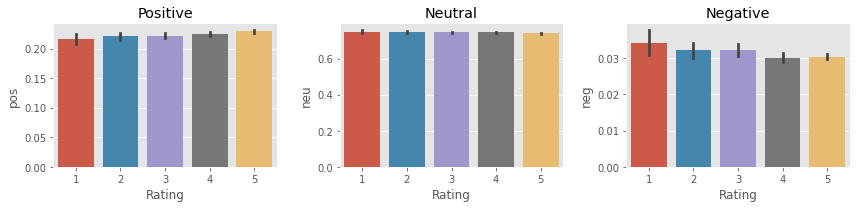

In [24]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='Rating', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='Rating', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='Rating', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

#  ***2. Roberta Pretrained Model***

In [25]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [26]:
Model = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(Model)
model = AutoModelForSequenceClassification.from_pretrained(Model)

Downloading:   0%|          | 0.00/747 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/476M [00:00<?, ?B/s]

In [27]:
example

"Why do designers keep making crop tops??!! i can't imagine this would be flattering on anyone, especially someone average height and well endowed on top. i looked like a football player. the pattern and fabric are gorgeous, so if you are like 4' tall and super tiny and can fit xxs this may work? i am between a 6-8 and fit a small and it was huge on me and almost was bigger at the bottom than the top. such a weird cut. there is a cami underneath so if it rides up that will show but that is so 80s"

In [28]:
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.18898077, 'roberta_neu': 0.41811568, 'roberta_pos': 0.39290363}


In [29]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [30]:
res = {}
for i, row in tqdm(data.iterrows(), total=len(data)):
    try:
        text = row['Review Text']
        myid = row['Clothing ID']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/19662 [00:00<?, ?it/s]

In [31]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Clothing ID'})
results_df = results_df.merge(data, how='left')

In [32]:
results_df

,Clothing ID,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,Unnamed: 0,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,1077,0.0,0.743,0.257,0.8542,0.005386,0.032144,0.962469,2,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
1,1077,0.0,0.743,0.257,0.8542,0.005386,0.032144,0.962469,8,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses
2,1077,0.0,0.743,0.257,0.8542,0.005386,0.032144,0.962469,9,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses
3,1077,0.0,0.743,0.257,0.8542,0.005386,0.032144,0.962469,10,53,Dress looks like it's made of cheap material,Dress runs small esp where the zipper area run...,3,0,14,General,Dresses,Dresses
4,1077,0.0,0.743,0.257,0.8542,0.005386,0.032144,0.962469,14,50,Pretty party dress with some issues,This is a nice choice for holiday gatherings. ...,3,1,1,General,Dresses,Dresses
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19657,262,0.0,0.802,0.198,0.6643,0.009789,0.039757,0.950454,23461,49,Comfortable but not super-flattering on me,I tried these on at the store and the fit was ...,4,1,1,General Petite,Intimate,Lounge
19658,262,0.0,0.802,0.198,0.6643,0.009789,0.039757,0.950454,23463,65,Comfy pants,"These pants overall are very comfortable, but ...",4,1,1,General Petite,Intimate,Lounge
19659,262,0.0,0.802,0.198,0.6643,0.009789,0.039757,0.950454,23469,50,Comfy and cute,My size was not available so based on reviews ...,4,1,0,General Petite,Intimate,Lounge
19660,262,0.0,0.802,0.198,0.6643,0.009789,0.039757,0.950454,23471,31,Awkward fit for me,"Love the way these pants look in the pictures,...",4,1,0,General Petite,Intimate,Lounge


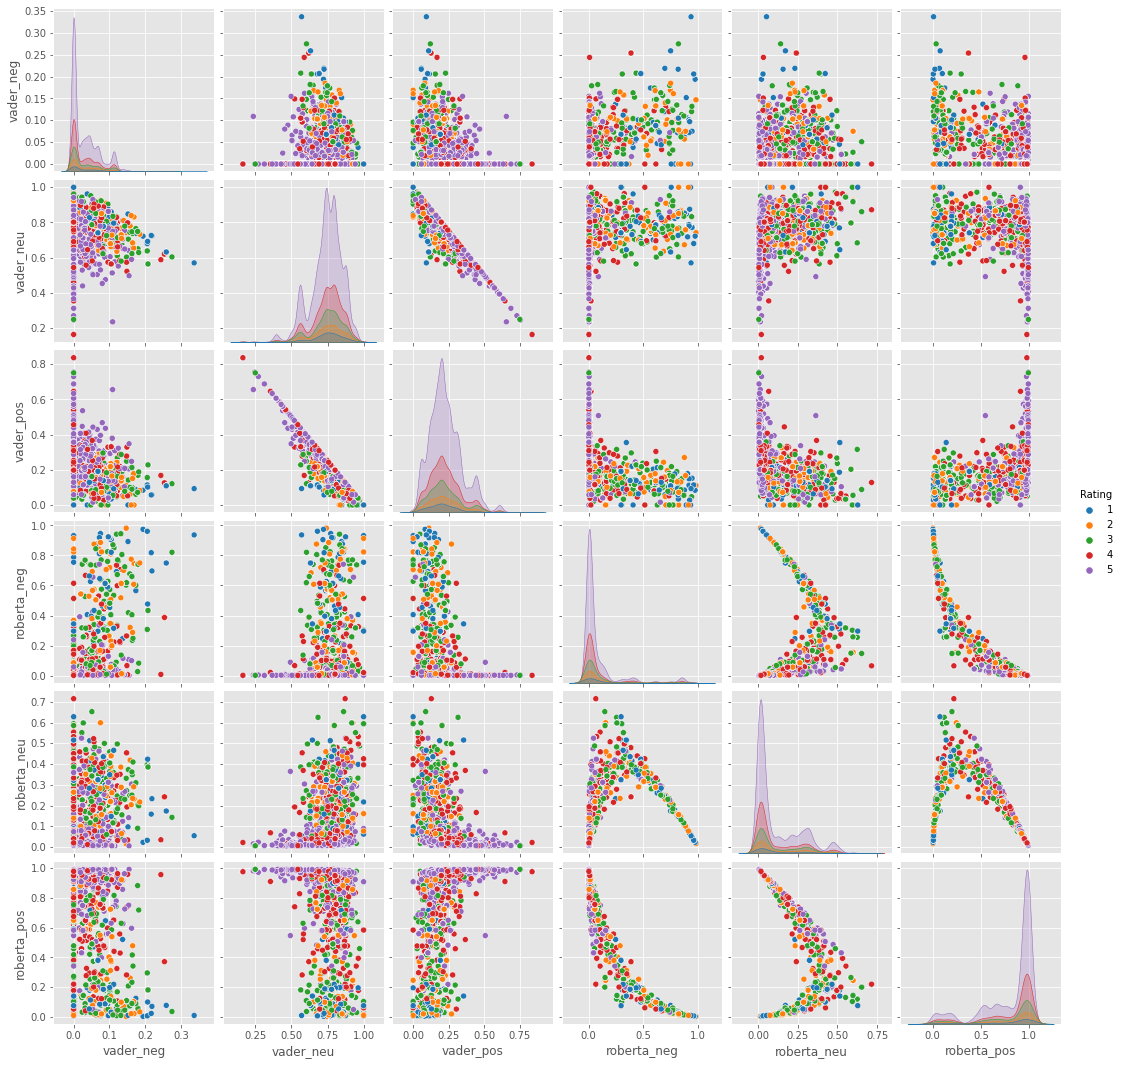

In [33]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Rating',
            palette='tab10')
plt.show()

In [34]:
results_df.query('Rating == 1') \
    .sort_values('roberta_pos', ascending=False)['Review Text'].values[0]

'I wish i had read the reviews prior to purchasing. this skirt looks amazing in photos and lace appears black. the lace on mine is actually purple - at first i thought it was just purple due to lighting with red underneath - but nope - pull the netting away and it is purple. lace netting hikes up on the right due to poor craftsmanship. i ordered a medium and felt it was a bit large. will return.'

In [35]:
results_df.query('Rating == 1') \
    .sort_values('vader_pos', ascending=False)['Review Text'].values[0]

"Cute skirt but i agree with the other reviewer. you can't get it on! i tried my skinny daughter tried no go!"

In [36]:
results_df.query('Rating == 5') \
    .sort_values('roberta_neg', ascending=False)['Review Text'].values[0]

'I actually like the fit - but i guess it depends on your overall body type. i too ordered a small and medium. i actually could fit the small, but preferred the room in the medium. the movement on these are spectacular and the material is light and cool.'

In [37]:
results_df.query('Rating == 5') \
    .sort_values('vader_neg', ascending=False)['Review Text'].values[0]

'I\'m in love, i\'m in love, and i don\'t care who knows it. i bought this vest on a whim and i\'m so glad i did. it\'s so soft and cozy. the medium brown color makes it highly versatile as well. i\'ve tried the faux fur vests and they are too bulky for my taste, but this was not bulky at all. warm and hangs well. i am 5\'5", 135lbs, curvy/athletic frame and the small was just right. try this vest on...i promise you will be in love!'